In [150]:
from IPython.display import display
import tqdm
import random
from matplotlib import pyplot as plt

import torch
from torch.utils.data import DataLoader
import torch.nn as nn
from torchvision import datasets, transforms
from sklearn.metrics import accuracy_score

In [151]:
height, width = 100, 150
ts = transforms.Compose([transforms.Resize((height, width)), transforms.ToTensor()])
fgvca = datasets.FGVCAircraft(root='data', download=True, transform=ts)
classes = fgvca.classes

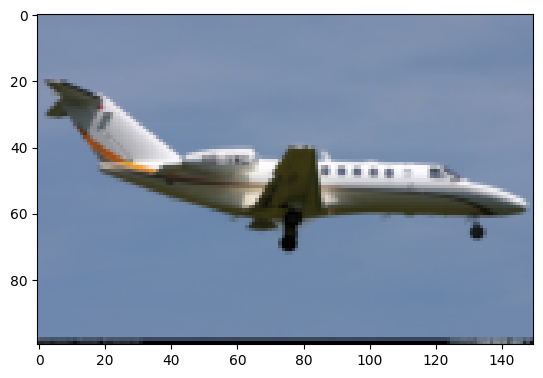

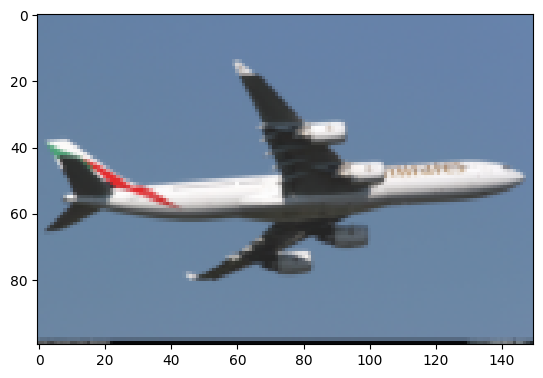

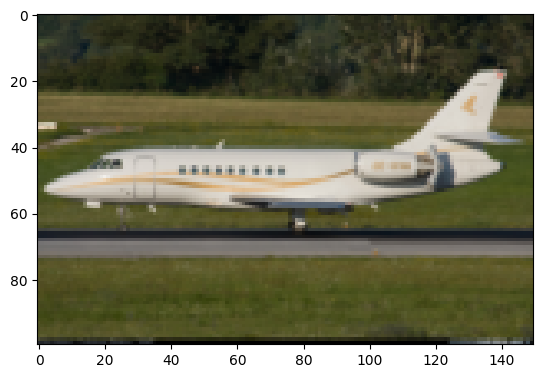

In [152]:
n_samples = 3

for _ in range(n_samples):
    idx = random.randint(0, len(fgvca))
    img, label_idx =  fgvca[idx]
    img = img.permute(1, 2, 0)
    plt.imshow(img.numpy())
    plt.show()

## Feed forward neural network

In [153]:

# Define the FFNN model
class FFNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(FFNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# Define the model hyperparameters
input_size = width * height * 3 # 3 for RGB
hidden_size = 64
output_size = len(classes)
lr = 0.001
batch_size = 32
epochs = 1

# Create the data loader
train_loader = DataLoader(dataset=fgvca, batch_size=batch_size, shuffle=True)

# Create the FFNN model instance
model = FFNN(input_size, hidden_size, output_size)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

# Train the model
for epoch in range(epochs):
    correct = 0
    for inputs, labels in tqdm.tqdm(train_loader, total=len(train_loader)):
        # Forward pass
        outputs = model(inputs.view(-1, input_size))
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        correct += (torch.max(outputs, dim=1).indices == labels).sum().item()

    # Print the training progress
    print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss.item():.4f}, Accuracy: {correct / len(fgvca):.2f}')
  

 81%|████████▏ | 170/209 [01:43<00:23,  1.64it/s]


KeyboardInterrupt: 